### Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import os

In [24]:
demo = pd.read_sas("DEMO_I.XPT")
demo = demo.drop(columns=["SDDSRVYR","RIDSTATR","RIDAGEMN","RIDRETH1","RIDEXAGM","DMQADFC","DMDYRSUS",
                          "DMDEDUC3","RIDEXPRG","SDMVPSU","SDMVSTRA","DMDHSEDU","SIALANG","SIAPROXY",
                          "SIAINTRP","FIALANG","FIAPROXY","FIAINTRP","MIALANG","MIAPROXY","MIAINTRP",
                          "AIALANGA","WTMEC2YR"])
bpx = pd.read_sas("BPX_I.XPT")
bpx = bpx.loc[:,["SEQN","BPXPLS","BPXSY2","BPXDI2"]]
bmx = pd.read_sas("BMX_I.XPT")
bmx = bmx.loc[:,["SEQN","BMXWT","BMXHT","BMXBMI","BMXLEG","BMXARML","BMXARMC","BMXWAIST","BMDAVSAD"]]
hdl = pd.read_sas("HDL_I.XPT")
hdl = hdl.loc[:,["SEQN","LBDHDD"]]
# tri = pd.read_sas("TRIGLY_I.XPT")
# tri = tri.loc[:,["SEQN","LBDLDL"]]
ghb = pd.read_sas("GHB_I.XPT")
ghb = ghb.loc[:,["SEQN","LBXGH"]]
pro = pd.read_sas("BIOPRO_I.XPT")
pro = pro.loc[:,["SEQN","LBXSAL","LBXSAPSI","LBXSASSI", "LBXSATSI", "LBXSBU", "LBXSC3SI", "LBXSCA",
                 "LBXSCH","LBXSCK","LBXSCLSI","LBXSCR","LBXSGB", "LBXSGL", "LBXSGTSI", "LBXSIR", 
                 "LBXSKSI","LBXSLDSI", "LBXSNASI", "LBXSOSSI", "LBXSPH", "LBXSTB", "LBXSTP","LBXSTR","LBXSUA"]]
cbi = pd.read_sas("CBC_I.XPT")
cbi = cbi.loc[:,["SEQN","LBXWBCSI", "LBXLYPCT", "LBXMOPCT", "LBXNEPCT","LBXEOPCT", "LBXBAPCT", "LBXRBCSI", "LBXHGB",
                "LBXHCT", "LBXMCVSI", "LBXMCHSI", "LBXRDW", "LBXPLTSI", "LBXMPSI"]]
hsq = pd.read_sas("HSQ_I.XPT")
hsq = hsq.loc[:,["SEQN","HSD010","HSQ500","HSQ510","HSQ520","HSQ590"]]

In [25]:
df_cluster=pd.merge(pro,cbi)
df_cluster=pd.merge(df_cluster,hdl)
df_cluster=pd.merge(df_cluster,ghb)
df_cluster=pd.merge(df_cluster,bpx)
df_cluster=pd.merge(df_cluster,bmx)
# df_cluster=pd.merge(df_cluster,tri)
df = pd.merge(demo, hsq, left_on="SEQN",right_on="SEQN",how='inner')
df = pd.merge(df_cluster,df)
df = df.loc[df.RIDAGEYR>=20,]
df = df[np.isfinite(df["HSD010"])]
df.reset_index(drop=True, inplace=True)
df.shape

(4966, 80)

### Resampling

In [27]:
## resampling
# import random
# ind=random.choices(range(df.shape[0]),weights=df["WTINT2YR"],k=df.shape[0])
# len(set(ind))

#df.loc[df.HSQ590.isin([7,9]),:]

4953

In [26]:
## replicate
ind=np.repeat(df.index,round(df["WTINT2YR"]/min(df["WTINT2YR"])))
df=df.iloc[ind,:]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38952 entries, 0 to 4965
Data columns (total 80 columns):
SEQN        38952 non-null float64
LBXSAL      37173 non-null float64
LBXSAPSI    37170 non-null float64
LBXSASSI    37177 non-null float64
LBXSATSI    37177 non-null float64
LBXSBU      37173 non-null float64
LBXSC3SI    37180 non-null float64
LBXSCA      37180 non-null float64
LBXSCH      37174 non-null float64
LBXSCK      37158 non-null float64
LBXSCLSI    37180 non-null float64
LBXSCR      37173 non-null float64
LBXSGB      37152 non-null float64
LBXSGL      37180 non-null float64
LBXSGTSI    37177 non-null float64
LBXSIR      37141 non-null float64
LBXSKSI     37180 non-null float64
LBXSLDSI    37178 non-null float64
LBXSNASI    37180 non-null float64
LBXSOSSI    37168 non-null float64
LBXSPH      37173 non-null float64
LBXSTB      37163 non-null float64
LBXSTP      37157 non-null float64
LBXSTR      37175 non-null float64
LBXSUA      37174 non-null float64
LBXWBCSI    37200

In [28]:
## categorical: little NA-drop, many NA-add indicator
df.RIAGENDR = df.RIAGENDR.replace({1:"Male", 2:"Female"})
df.RIDRETH3 = df.RIDRETH3.replace({1:"Mexican American", 2:"Other Hispanic", 3:"Non-Hispanic White", 4:"Non-Hispanic Black", 6:"Non-Hispanic Asian", 7:"Other Race"})
df.RIDEXMON = df.RIDEXMON.replace({1:"November 1 through April 30", 2:"May 1 through October 31"})
df.DMQMILIZ = df.DMQMILIZ.replace({1:"Yes", 2:"No"})
df = df.loc[df.DMDBORN4<7,]
df.DMDBORN4 = df.DMDBORN4.replace({1:"Born in 50 US states or Washington, DC", 2:"Others"})
df = df.loc[df.DMDCITZN<7,]
df.DMDCITZN = df.DMDCITZN.replace({1:"Citizen by birth or naturalization", 2:"Not a citizen of the US"})
df = df.loc[df.DMDEDUC2<7,]
df.DMDEDUC2 = df.DMDEDUC2.replace({1:"Less than 9th grade", 2:"9-11th grade (Includes 12th grade with no diploma)", 3:"High school graduate/GED or equivalent", 4:"Some college or AA degree", 5:"College graduate or above"})
df = df.loc[df.DMDMARTL<7,]
df.DMDMARTL = df.DMDMARTL.replace({1:"Married", 2:"Widowed", 3:"Divorced", 4:"Separated", 5:"Never married", 6:"Living with partner"})
df.DMDHRGND = df.DMDHRGND.replace({1:"Male", 2:"Female"})
df.DMDHRBR4 = df.DMDHRBR4.astype("object").replace([77,99], np.nan)
df.DMDHRBR4 = df.DMDHRBR4.replace({1:"Born in 50 US states or Washington, DC", 2:"Others"})
df.DMDHREDU=df.DMDHREDU.astype("object").replace([7,9], np.nan)
df.DMDHREDU = df.DMDHREDU.replace({1:"Less than 9th grade", 2:"9-11th grade (Includes 12th grade with no diploma)", 3:"High school graduate/GED or equivalent", 4:"Some college or AA degree", 5:"College graduate or above"})
df.DMDHRMAR=df.DMDHRMAR.astype("object").replace([77,99], np.nan)
df.DMDHRMAR = df.DMDHRMAR.replace({1:"Married", 2:"Widowed", 3:"Divorced", 4:"Separated", 5:"Never married", 6:"Living with partner"})
df.INDHHIN2 = df.INDHHIN2.astype("object").replace([77,99], np.nan)
df.INDFMIN2 = df.INDFMIN2.astype("object").replace([77,99], np.nan)
df.HSD010 = df.HSD010.replace({1:"Excellent", 2:"Very good", 3:"Good", 4:"Fair", 5:"Poor"})
df = df.loc[df.HSQ500<7,]
df.HSQ500 = df.HSQ500.replace({1:"Yes", 2:"No"})
df = df.loc[df.HSQ510<7,]
df.HSQ510 = df.HSQ510.replace({1:"Yes", 2:"No"})
df = df.loc[df.HSQ520<7,]
df.HSQ520 = df.HSQ520.replace({1:"Yes", 2:"No"})
df.HSQ590 = df.HSQ590.replace({1:"Yes", 2:"No"}).replace([7,9], np.nan)

In [29]:
df.shape

(38671, 80)

In [41]:
df1=df.iloc[:,range(52)]
df2=pd.concat([df.iloc[:,0],df.iloc[:,52:]],axis=1)

In [42]:
df1.shape,df2.shape

((38671, 52), (38671, 29))

### Clustering

In [43]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
df1= pd.DataFrame(imp.fit_transform(df1))

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
df1_scaled = MinMaxScaler().fit_transform(df1.iloc[:,1:])
avg = []
scores = []
for k in range(2,21):
    clusterer = KMeans(n_clusters=k, random_state=0)
    cluster_labels = clusterer.fit_predict(df1_scaled)
    avg.append(silhouette_score(df1_scaled, cluster_labels))
    scores.append(-clusterer.score(df1_scaled))

In [48]:
avg

[0.13701094956753665,
 0.10711008915495697,
 0.09658940794815747,
 0.07587976377769959,
 0.07600524718750507,
 0.06839092778938913,
 0.05902754327549209,
 0.06056479387700064,
 0.06249732956061123,
 0.05335907417453845,
 0.04467725743964505,
 0.04671381828630045,
 0.04470475499861391,
 0.04542350977438057,
 0.045310875264646895,
 0.04780810742027608,
 0.049690254027885995,
 0.045142563465301266,
 0.04442008112989899]

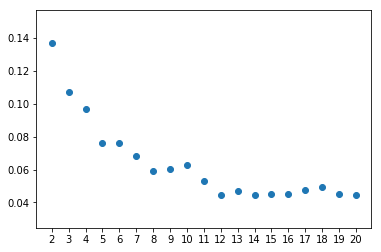

In [49]:
plt.scatter(list(range(2,21)), avg)
plt.xticks(range(2,21))
plt.show()

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = list(range(2,11))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Automatically created module for IPython interactive environment


NameError: name 'X' is not defined

### Classification

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df2.loc[:,df2.columns!="HSD010"],df2["HSD010"],random_state=0)
imp_cat=SimpleImputer(missing_values=np.nan, strategy="most_frequent",add_indicator=True)
imp_num=SimpleImputer(missing_values=np.nan, strategy="mean",add_indicator=True)
X_train_num=X_train.loc[:,X_train.dtypes!=object]
X_train_cat=X_train.loc[:,X_train.dtypes==object]
X_test_num=X_test.loc[:,X_test.dtypes!=object]
X_test_cat=X_test.loc[:,X_test.dtypes==object]
num_colnames = list(X_train_num.columns)+["ind_INDHHIN2", "ind_INDFMIN2", "ind_INDFMPIR"]
cat_colnames = list(X_train_cat.columns)+["ind_DMDHRBR4", "ind_DMDHREDU", "ind_DMDHRMAR", "ind_HSQ590"]
X_train=pd.concat([pd.DataFrame(imp_num.fit_transform(X_train_num),columns=num_colnames),pd.DataFrame(imp_cat.fit_transform(X_train_cat),columns=cat_colnames)],axis=1)
X_test=pd.concat([pd.DataFrame(imp_num.transform(X_test_num),columns=num_colnames),pd.DataFrame(imp_cat.transform(X_test_cat),columns=cat_colnames)],axis=1)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_train_cat = enc.fit_transform(X_train.select_dtypes(include='object'))
X_test_cat = enc.transform(X_test.select_dtypes(include='object'))
X_train=pd.concat([X_train.select_dtypes(exclude='object'),pd.DataFrame(X_train_cat.toarray(),columns=enc.get_feature_names(cat_colnames))], axis=1)
X_test=pd.concat([X_test.select_dtypes(exclude='object'),pd.DataFrame(X_test_cat.toarray(),columns=enc.get_feature_names(cat_colnames))], axis=1)

In [135]:
X_train.shape,X_test.shape

((29003, 73), (9668, 73))